## Project 4   Hack-a-thon

### Problem Statement:


In [111]:
#Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [112]:
df = pd.read_csv('data/cheap_train_sample.csv')

In [42]:
df1 = pd.read_csv('data/test_data.csv')

In [43]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   sex             16281 non-null  object
 9   capital-gain    16281 non-null  int64 
 10  capital-loss    16281 non-null  int64 
 11  hours-per-week  16281 non-null  int64 
 12  native-country  16281 non-null  object
dtypes: int64(6), object(7)
memory usage: 1.6+ MB


In [44]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

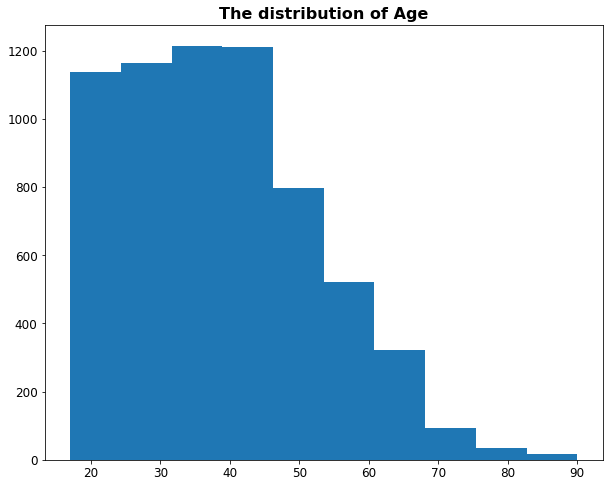

In [114]:
plt.figure(figsize = (10,8))
plt.hist(df['age']);
#sns.catplot(x ='age', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Age',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 0, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);

<Figure size 720x576 with 0 Axes>

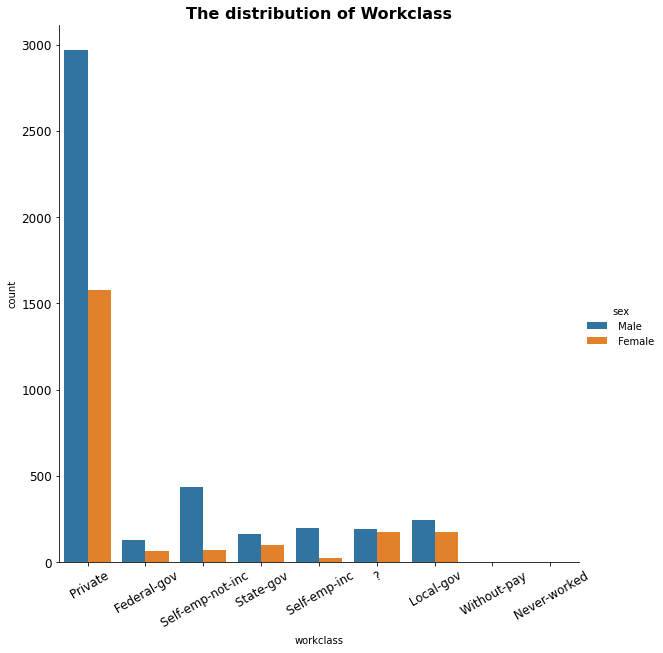

In [115]:
plt.figure(figsize = (10,8))
#plt.hist(df['workclass']);
sns.catplot(x ='workclass', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Workclass',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);

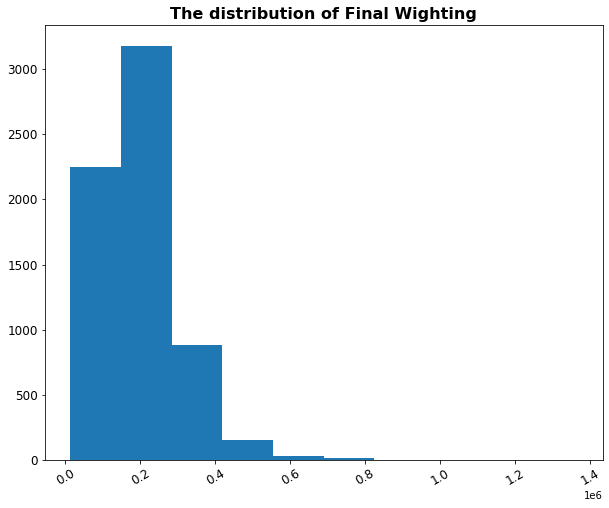

In [135]:
plt.figure(figsize = (10,8))
plt.hist(df['fnlwgt']);
#sns.catplot(x ='fnlwgt', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Final Wighting',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 12)
plt.yticks(rotation = 0, fontsize = 12);

<Figure size 1440x576 with 0 Axes>

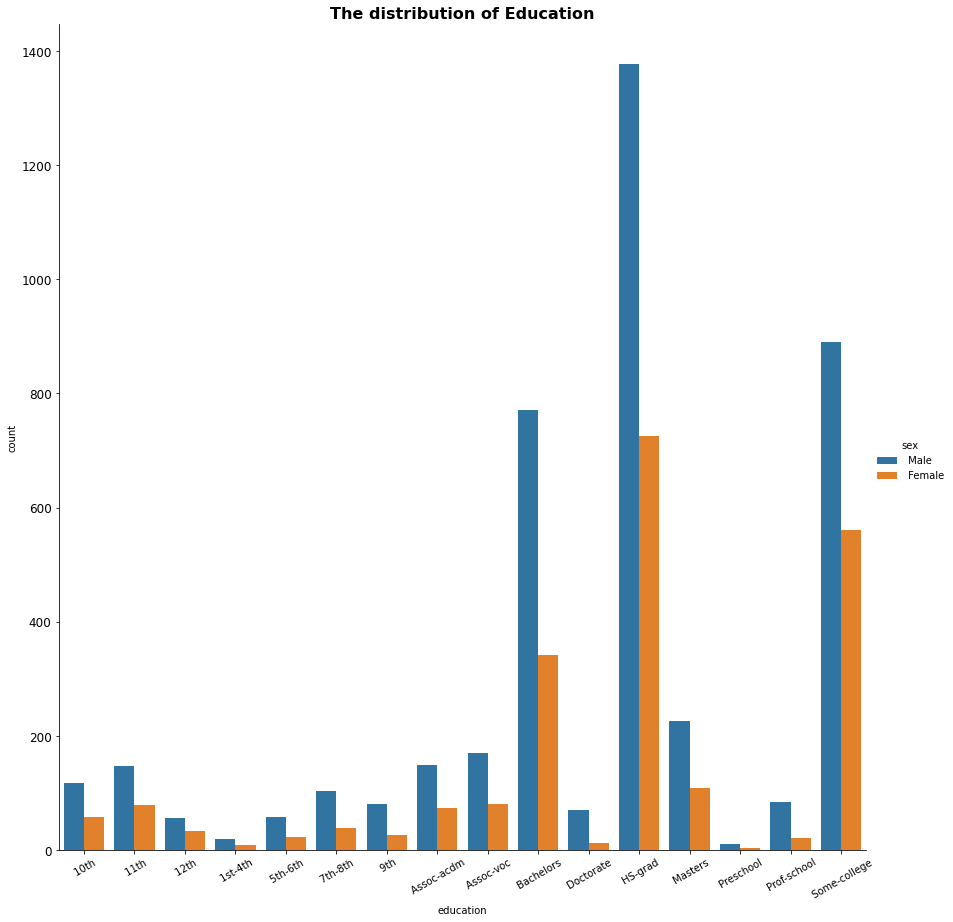

In [142]:
df_ed = df.sort_values(by = 'education')
plt.figure(figsize = (20,8))
#plt.hist(df['education']);
sns.catplot(x ='education', hue ='sex', kind ='count', data = df_ed, height = 12)
plt.title('The distribution of Education',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 12);

<Figure size 720x576 with 0 Axes>

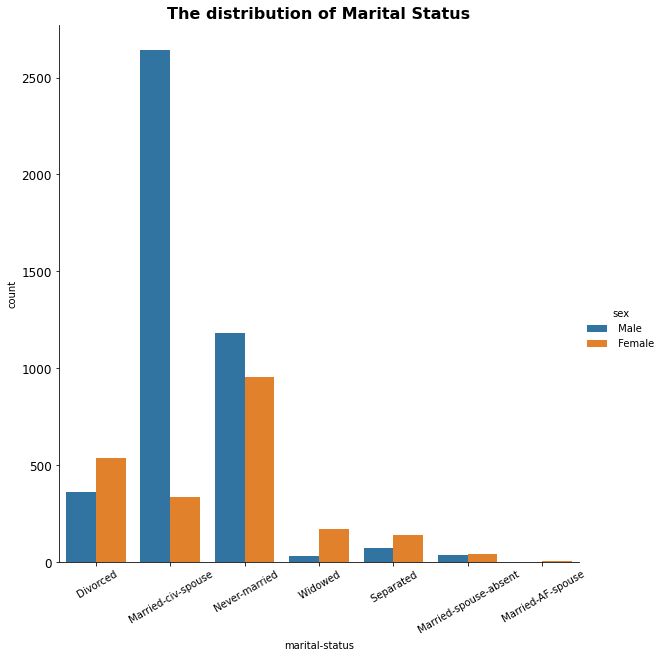

In [117]:
plt.figure(figsize = (10,8))
#plt.hist(df['marital-status'])
sns.catplot(x ='marital-status', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Marital Status',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 12);

<Figure size 720x576 with 0 Axes>

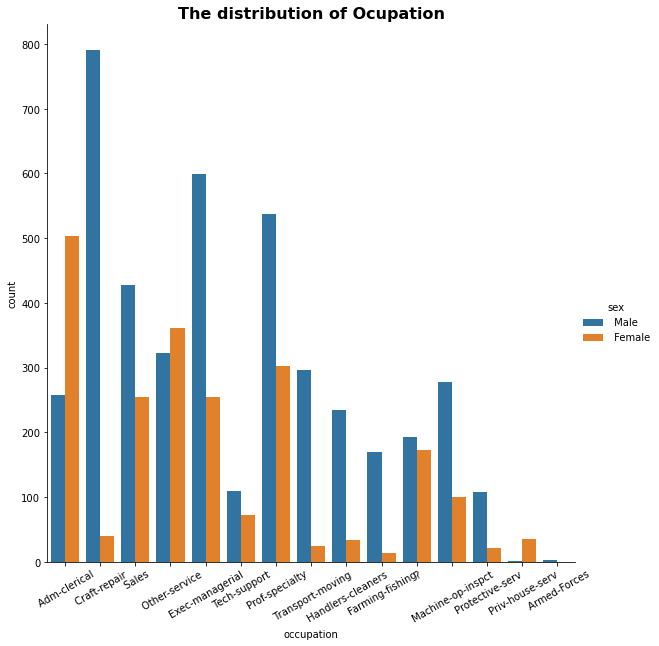

In [119]:
plt.figure(figsize = (10,8))
#plt.hist(df['occupation'])
sns.catplot(x ='occupation', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Ocupation',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

<Figure size 720x576 with 0 Axes>

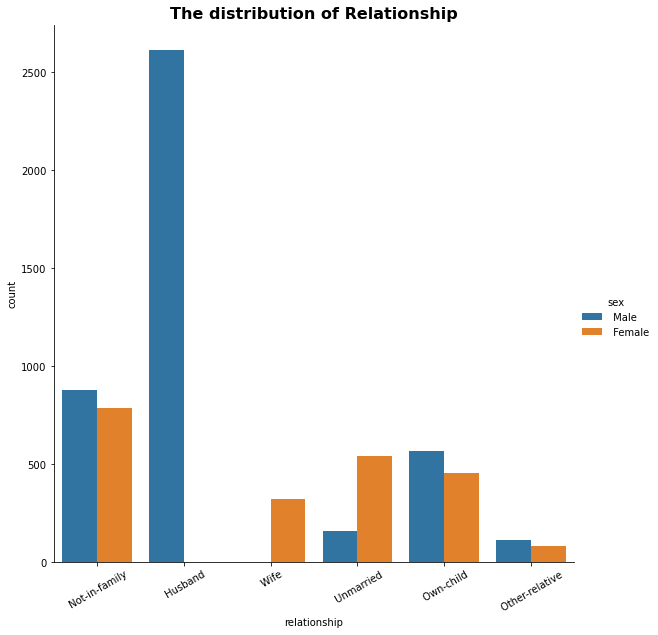

In [120]:
plt.figure(figsize = (10,8))
#plt.hist(df['relationship'])
sns.catplot(x ='relationship', hue ='sex', kind ='count', data = df, height = 8)
plt.title('The distribution of Relationship',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

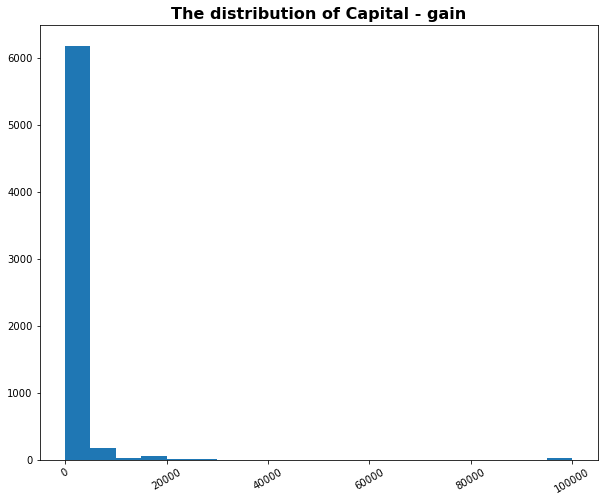

In [126]:
plt.figure(figsize = (10,8))
plt.hist(df['capital-gain'], bins = 20)
#sns.catplot(x ='capital-gain', hue ='sex', kind ='count', data = df, height = 8, bins = 20)
plt.title('The distribution of Capital - gain',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

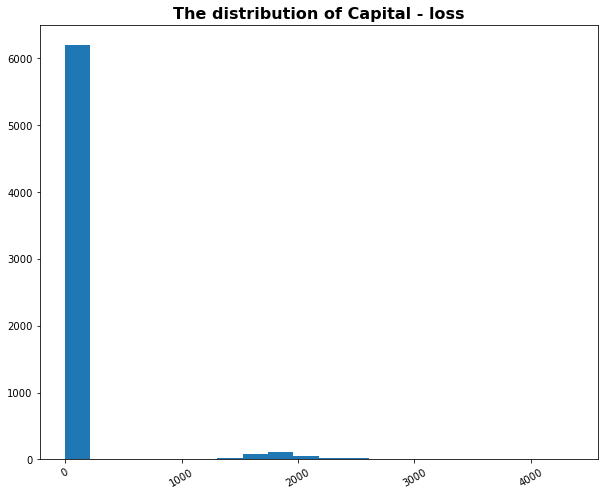

In [127]:
plt.figure(figsize = (10,8))
plt.hist(df['capital-loss'], bins = 20)
#sns.catplot(x ='capital-gain', hue ='sex', kind ='count', data = df, height = 8, bins = 20)
plt.title('The distribution of Capital - loss',fontsize = 16,fontweight='bold')
plt.xticks(rotation = 30, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10);

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6513 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education-num   6513 non-null   int64 
 5   marital-status  6513 non-null   object
 6   occupation      6513 non-null   object
 7   relationship    6513 non-null   object
 8   sex             6513 non-null   object
 9   capital-gain    6513 non-null   int64 
 10  capital-loss    6513 non-null   int64 
 11  hours-per-week  6513 non-null   int64 
 12  native-country  6513 non-null   object
 13  wage            6513 non-null   object
dtypes: int64(6), object(8)
memory usage: 712.5+ KB


In [54]:
df.fnlwgt.value_counts()

138852    6
112497    5
185385    5
203488    4
134886    4
         ..
206046    1
128224    1
332703    1
214242    1
172032    1
Name: fnlwgt, Length: 5856, dtype: int64

In [55]:
df.describe()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.529556,1.926640e+05,10.068478,1059.200829,92.108092,40.400891
std,13.684351,1.060173e+05,2.589238,7392.040587,413.710886,12.354685
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.202380e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.815760e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.417530e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.366120e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

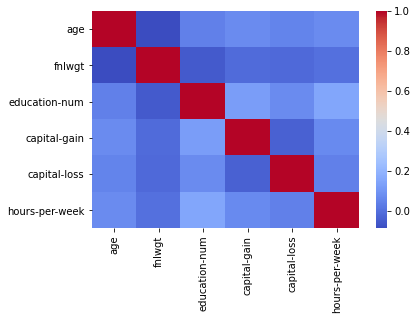

In [56]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [57]:
#clean object features to be numeric.
#alot of features for a limited amount of unique data points.
df.workclass.value_counts()

 Private             4545
 Self-emp-not-inc     504
 Local-gov            421
 ?                    363
 State-gov            262
 Self-emp-inc         225
 Federal-gov          189
 Never-worked           2
 Without-pay            2
Name: workclass, dtype: int64

In [58]:
# good spread of values representing the data, however will use entire feature allotment.
#Already have numerical column
df['education-num'].value_counts()

9     2103
10    1451
13    1113
14     334
11     250
7      225
12     222
6      175
4      142
5      106
15     103
8       89
16      81
3       79
2       27
1       13
Name: education-num, dtype: int64

In [59]:
df.education.value_counts()

 HS-grad         2103
 Some-college    1451
 Bachelors       1113
 Masters          334
 Assoc-voc        250
 11th             225
 Assoc-acdm       222
 10th             175
 7th-8th          142
 9th              106
 Prof-school      103
 12th              89
 Doctorate         81
 5th-6th           79
 1st-4th           27
 Preschool         13
Name: education, dtype: int64

In [60]:
df['marital-status'].value_counts()

 Married-civ-spouse       2978
 Never-married            2135
 Divorced                  898
 Separated                 210
 Widowed                   204
 Married-spouse-absent      81
 Married-AF-spouse           7
Name: marital-status, dtype: int64

In [61]:
df['occupation'].value_counts()

 Exec-managerial      853
 Prof-specialty       840
 Craft-repair         831
 Adm-clerical         761
 Other-service        684
 Sales                681
 Machine-op-inspct    377
 ?                    365
 Transport-moving     320
 Handlers-cleaners    268
 Farming-fishing      184
 Tech-support         182
 Protective-serv      129
 Priv-house-serv       36
 Armed-Forces           2
Name: occupation, dtype: int64

In [62]:
df['relationship'].value_counts()

 Husband           2612
 Not-in-family     1665
 Own-child         1019
 Unmarried          701
 Wife               322
 Other-relative     194
Name: relationship, dtype: int64

In [63]:
df['sex'].value_counts()

 Male      4326
 Female    2187
Name: sex, dtype: int64

In [64]:
df['native-country'].value_counts()

 United-States                 5807
 Mexico                         150
 ?                              120
 Philippines                     43
 El-Salvador                     29
 Canada                          26
 Germany                         24
 Dominican-Republic              20
 South                           18
 Jamaica                         18
 India                           17
 China                           17
 Puerto-Rico                     17
 England                         16
 Cuba                            16
 Italy                           15
 Poland                          14
 Japan                           12
 Columbia                        11
 Guatemala                       11
 Haiti                           11
 Iran                            10
 Taiwan                          10
 Peru                             9
 France                           9
 Vietnam                          8
 Cambodia                         6
 Nicaragua                  

In [65]:
df = pd.get_dummies(df, columns=['occupation','relationship', 'sex', 'marital-status', 'workclass', 'native-country'],
                    drop_first=True)

In [66]:
df.wage.value_counts()
#below or equal to 50k will be true.

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

In [67]:
df['wage'] = [1 if wage == ' <=50K' else 0 for wage in df.wage]

In [68]:
df.wage.value_counts()

1    4945
0    1568
Name: wage, dtype: int64

In [69]:
X = df.drop(columns=['wage', 'education'])
features = X.columns
y = df['wage']

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=420)

In [70]:
#Baseline score

guess = [1 if pred == 1 else 0 for pred in y]
sum(guess)/len(guess)

0.7592507293106096

In [71]:
rfc = RandomForestClassifier()

cross_val_score(rfc, X,y, cv=5).mean()

0.8476873055562433

In [72]:
svc = SVC()
cross_val_score(svc,X,y,cv= 5).mean()

0.7683099264016751

In [73]:
boost = AdaBoostClassifier()

cross_val_score(boost,X,y,cv=5).mean()

0.8576684078924567

In [74]:
logr= LogisticRegression()
cross_val_score(logr,X,y,cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7921103727307773

In [75]:
tree = DecisionTreeClassifier()
cross_val_score(tree, X,y,cv=5).mean()

0.8014733811728341

In [76]:
x_trees = ExtraTreeClassifier()
cross_val_score(x_trees, X,y,cv= 5).mean()

0.7873435166159153

In [77]:
knn = KNeighborsClassifier()

In [129]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_val, y_val))
predictions = pipe.predict(X_val)
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

Training Score:  0.8656838656838657
Validation Score:  0.8158379373848987
[[ 214  167]
 [ 133 1115]]
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       381
           1       0.87      0.89      0.88      1248

    accuracy                           0.82      1629
   macro avg       0.74      0.73      0.73      1629
weighted avg       0.81      0.82      0.81      1629



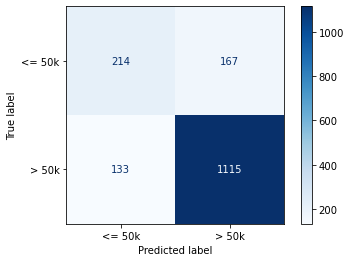

In [133]:
from sklearn import metrics as metrics
metrics.plot_confusion_matrix(pipe, X_val, y_val, cmap='Blues', 
                      values_format='d', display_labels=['<= 50k', '> 50k']);

In [79]:
pipe = Pipeline([('scaler', StandardScaler()),('boost', AdaBoostClassifier())])
pipe.fit(X_train, y_train)
print(f'Training Score: ', pipe.score(X_train,y_train))
print(f'Validation Score: ', pipe.score(X_val, y_val))

Training Score:  0.8486895986895987
Validation Score:  0.861878453038674


In [80]:
predictions = pipe.predict(X_val)
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

[[ 246  135]
 [  90 1158]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       381
           1       0.90      0.93      0.91      1248

    accuracy                           0.86      1629
   macro avg       0.81      0.79      0.80      1629
weighted avg       0.86      0.86      0.86      1629



In [82]:
boost = AdaBoostClassifier()
boost.fit(X_train,y_train)

values = boost.feature_importances_

feat = pd.DataFrame(features)
feat['values'] = values

df_feat = feat.sort_values(by= 'values', ascending=False).head(20)


In [94]:
df_feat.columns = ['features','values']

In [99]:
df_feat

,features,values
2,education-num,0.12
3,capital-gain,0.12
5,hours-per-week,0.12
1,fnlwgt,0.12
0,age,0.10
4,capital-loss,0.06
25,sex_ Male,0.04
27,marital-status_ Married-civ-spouse,0.04
24,relationship_ Wife,0.04
9,occupation_ Exec-managerial,0.02


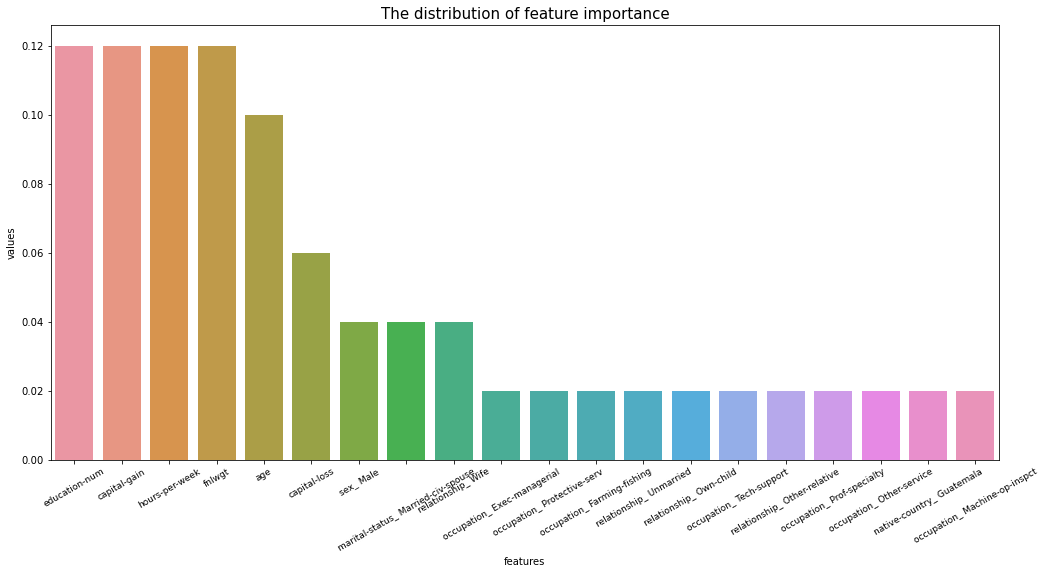

In [143]:
plt.figure(figsize = (17,8))
plt.title('The distribution of feature importance',fontsize = 15)
sns.barplot(x = 'features',y = 'values', data = df_feat)
#df_feat.plot(kind='bar')
plt.xticks(rotation = 30, fontsize = 9)
plt.yticks(rotation = 0, fontsize = 10);

In [102]:
#sns.pairplot(df)

In [383]:
#weight features and adjust hyperparameters.
#what if for feature with an importance below .1  we multiply the
estimators = np.random.randint(10,300,90)
params = dict(n_estimators= estimators)

grid = GridSearchCV(AdaBoostClassifier(), param_grid=params, n_jobs=-1, cv= 5)
grid.fit(X_train,y_train)
print(f'Training Score: ', grid.score(X_train,y_train))
print(f'Validation Score: ', grid.score(X_val,y_val))
print(grid.best_params_)
print(grid.best_score_)

Training Score:  0.8681408681408681
Validation Score:  0.858195211786372
{'n_estimators': 205}
0.852784326392268


In [ ]:
l_rate = np.logspace(-2,0,10)
estimators = np.random.randint(100,200,5)
criterion = ('friedman_mse', 'mse', 'mae')
max_features = (None, 'sqrt', 'log2')
params = dict(n_estimators= estimators,
              learning_rate= l_rate,
              criterion= criterion,
              max_features= max_features)

grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, n_jobs=-1, cv= 5, verbose= 1)
grid.fit(X_train,y_train)
print(f'Training Score: ', grid.score(X_train,y_train))
print(f'Validation Score: ', grid.score(X_val,y_val))
print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 450 candidates, totalling 2250 fits
